In [1]:
#!pip install ydata-profiling
#!pip install joblib

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('furniture sales\Sample - Superstore-newdate.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2022-11-07,2022-11-10,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2022-11-07,2022-11-10,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2022-06-11,2022-06-15,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2021-10-09,2021-10-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2021-10-09,2021-10-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()

In [5]:
df['per_unit_price'] = df['Sales'] / df['Quantity']
df['per_unit_profit'] = df['Profit'] / df['Quantity']
df['Profit_margin'] = df['Profit'] / df['Sales']
df['Original_Price'] = df['Sales'] / (1 - df['Discount'])
df['original_per_unit_price'] = df['Original_Price'] / df['Quantity']

In [6]:
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

In [7]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
1       2  CA-2016-152156 2022-11-07 2022-11-10    Second Class    CG-12520   
2       3  CA-2016-138688 2022-06-11 2022-06-15    Second Class    DV-13045   
3       4  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   
4       5  US-2015-108966 2021-10-09 2021-10-16  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Quantity  \
0      Claire Gute   Consumer  United States        Henderson  ...        2   
1      Claire Gute   Consumer  United States        Henderson  ...        3   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...        2   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        5   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        2   

   Discount    Profit per_unit_price per_unit_prof

In [8]:
pd.set_option('display.max_rows', None)
df['original_per_unit_price'].value_counts().sort_index(ascending=True)

0.99         2
0.99         5
0.99         3
1.14         3
1.24         5
1.26         5
1.34         1
1.39         1
1.39         2
1.48         4
1.48         3
1.60         3
1.64         4
1.64         1
1.68         1
1.68        13
1.68         5
1.74         5
1.76        23
1.76         3
1.78         3
1.80         2
1.80         7
1.80         3
1.81         3
1.81        10
1.82         1
1.82        13
1.82         2
1.84         2
1.86         4
1.88         3
1.88        13
1.88         3
1.89         6
1.95         2
1.97         1
1.97         2
1.98         6
1.98        14
2.01         8
2.04        10
2.04         1
2.08         1
2.08        14
2.08         2
2.10         3
2.15         5
2.16         5
2.16         2
2.18        25
2.19         4
2.20         3
2.21        14
2.22         4
2.23         4
2.28         3
2.33         6
2.46         1
2.46         5
2.47         4
2.48         2
2.52         5
2.58         5
2.58         1
2.60         3
2.61      

In [9]:
def analyze_and_filter_column(df, column_name):
    # Convert column to list and plot boxplot
    column_data = df[column_name].tolist()
    fig, ax = plt.subplots()
    ax.set_title(f'{column_name} Boxplot')
    ax.set_ylabel(column_name)
    ax.boxplot(column_data)
    plt.show()

    # Calculate quartiles and IQR
    quartiles = df[column_name].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Print quartile information
    print(f"The lower quartile of {column_name} is: {lowerq}")
    print(f"The upper quartile of {column_name} is: {upperq}")
    print(f"The interquartile range of {column_name} is: {iqr}")
    print(f"The median of {column_name} is: {quartiles[0.5]} ")

    # Identify potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # Filter out potential outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    df_filtered = df_filtered.copy()
    # Perform quantile binning
    quantiles = [0, .25, .5, .75, 1.]
    df_filtered[f'{column_name}_binned'] = pd.qcut(df_filtered[column_name], quantiles, duplicates='drop')

    # Return the filtered and binned DataFrame
    return df_filtered

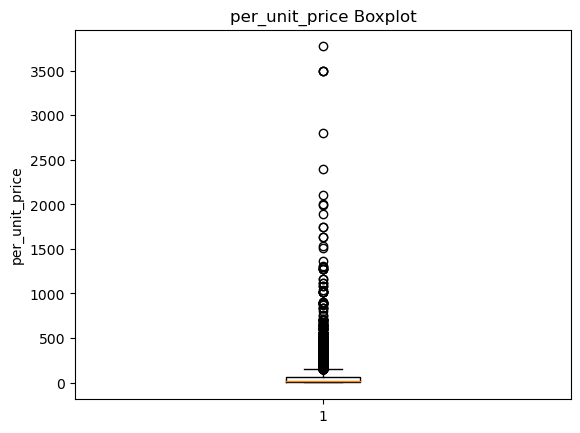

The lower quartile of per_unit_price is: 5.47
The upper quartile of per_unit_price is: 63.94
The interquartile range of per_unit_price is: 58.47
The median of per_unit_price is: 16.27 
Values below -82.235 could be outliers.
Values above 151.64499999999998 could be outliers.


In [10]:
column_name = 'per_unit_price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

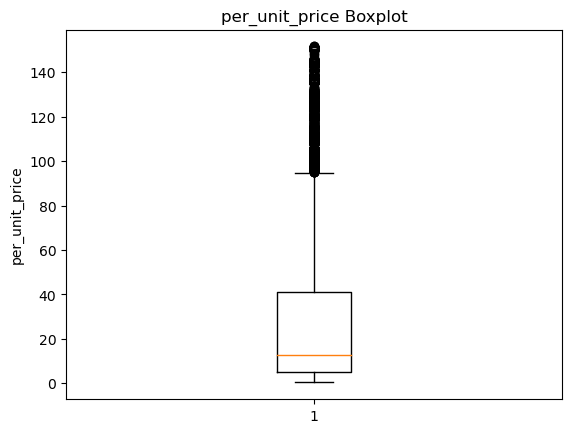

The lower quartile of per_unit_price is: 5.08
The upper quartile of per_unit_price is: 40.99
The interquartile range of per_unit_price is: 35.910000000000004
The median of per_unit_price is: 12.536000000000001 
Values below -48.78500000000001 could be outliers.
Values above 94.85500000000002 could be outliers.


In [11]:
column_name = 'per_unit_price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

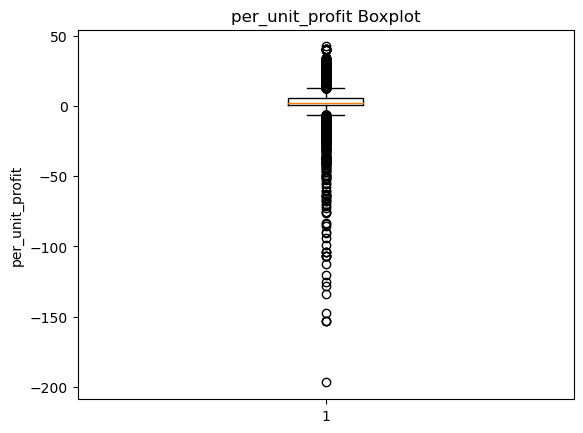

The lower quartile of per_unit_profit is: 0.7103999999999999
The upper quartile of per_unit_profit is: 5.4392
The interquartile range of per_unit_profit is: 4.7288
The median of per_unit_profit is: 2.2172 
Values below -6.3828 could be outliers.
Values above 12.532399999999999 could be outliers.


In [12]:
column_name = 'per_unit_profit'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

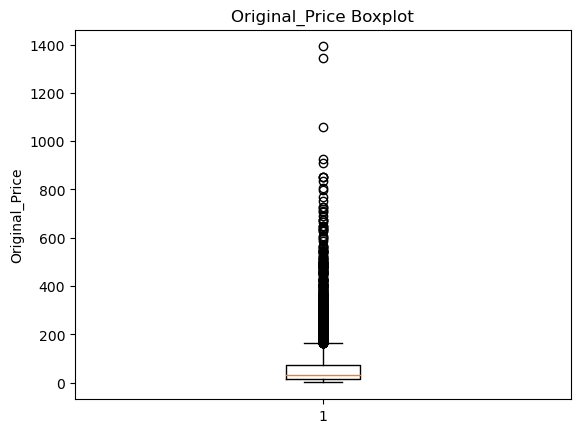

The lower quartile of Original_Price is: 14.940000000000001
The upper quartile of Original_Price is: 73.975
The interquartile range of Original_Price is: 59.035
The median of Original_Price is: 32.400000000000006 
Values below -73.6125 could be outliers.
Values above 162.52749999999997 could be outliers.


In [13]:
column_name = 'Original_Price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

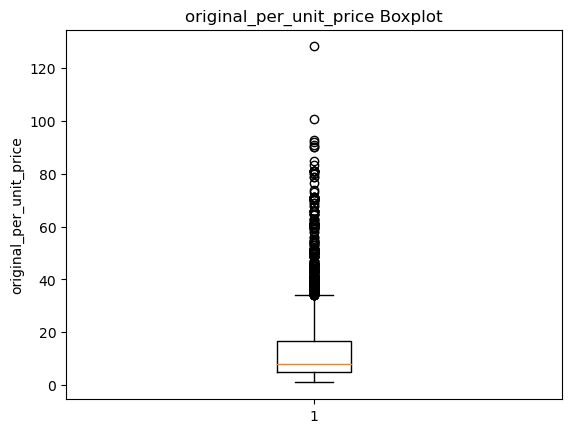

The lower quartile of original_per_unit_price is: 4.94
The upper quartile of original_per_unit_price is: 16.59
The interquartile range of original_per_unit_price is: 11.649999999999999
The median of original_per_unit_price is: 7.96 
Values below -12.534999999999997 could be outliers.
Values above 34.065 could be outliers.


In [14]:
column_name = 'original_per_unit_price'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

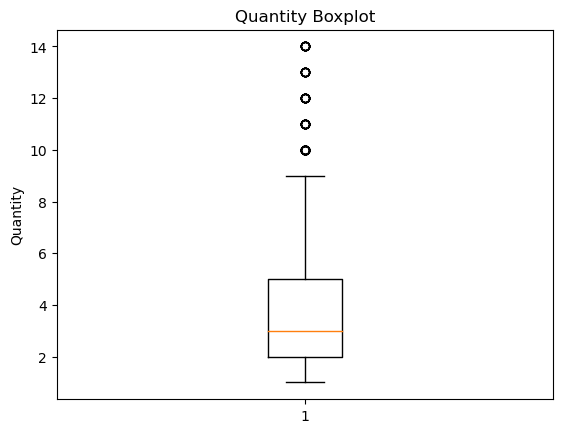

The lower quartile of Quantity is: 2.0
The upper quartile of Quantity is: 5.0
The interquartile range of Quantity is: 3.0
The median of Quantity is: 3.0 
Values below -2.5 could be outliers.
Values above 9.5 could be outliers.


In [15]:
column_name = 'Quantity'
df = df.copy()
df = analyze_and_filter_column(df, column_name)

In [16]:
description = df.describe()
description

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,per_unit_price,per_unit_profit,Profit_margin,Original_Price,original_per_unit_price,order_month,order_year
count,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000
mean,4989.270749,54968.540789,30.687879,3.603079,0.146647,7.941313,8.822677,2.255672,0.180779,35.890023,10.296213,7.790833,2021.729782
std,2873.434040,32060.263737,28.944846,1.928212,0.211704,11.635358,6.968993,2.845450,0.452305,31.814035,7.535973,3.258828,1.121975
min,3.000000,1453.000000,0.444000,1.000000,0.000000,-42.463800,0.336000,-6.355200,-2.750000,0.990000,0.990000,1.000000,2020.000000
25%,2519.500000,22304.000000,10.368000,2.000000,0.000000,2.024950,3.592000,0.805600,0.162500,12.960000,4.820000,5.000000,2021.000000
50%,4958.000000,55407.000000,20.320000,3.000000,0.000000,5.762400,6.480000,1.831600,0.325000,25.020000,7.280000,9.000000,2022.000000
75%,7472.500000,90004.000000,41.412000,5.000000,0.200000,12.097800,12.408000,3.435700,0.440000,48.125000,14.800000,11.000000,2023.000000
max,9993.000000,99301.000000,161.820000,9.000000,0.800000,74.852400,33.990000,12.475400,0.500000,162.400000,33.990000,12.000000,2023.000000


In [17]:
df = df.drop(columns = ["Row ID", "Order ID",'Region', "Customer ID", "City", "Product Name", "Product ID", "Customer Name","Ship Date"])

In [18]:
#To Do
#Ml choose
#Add comments

In [19]:
#Regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [20]:
df.head()

,Order Date,Ship Mode,Segment,Country,State,Postal Code,Category,Sub-Category,Sales,Quantity,...,Profit_margin,Original_Price,original_per_unit_price,order_month,order_year,per_unit_price_binned,per_unit_profit_binned,Original_Price_binned,original_per_unit_price_binned,Quantity_binned
2,2022-06-11,Second Class,Corporate,United States,California,90036,Office Supplies,Labels,14.620,2,...,0.4700,14.62,7.31,6,2022,"(4.77, 10.392]","(2.085, 4.22]","(13.9, 27.92]","(7.28, 14.8]","(0.999, 2.0]"
4,2021-10-09,Standard Class,Consumer,United States,Florida,33311,Office Supplies,Storage,22.368,2,...,0.1125,27.96,13.98,10,2021,"(10.392, 29.99]","(0.835, 2.085]","(27.92, 57.96]","(7.28, 14.8]","(0.999, 2.0]"
5,2020-06-07,Standard Class,Consumer,United States,California,90032,Furniture,Furnishings,48.860,7,...,0.2900,48.86,6.98,6,2020,"(4.77, 10.392]","(0.835, 2.085]","(27.92, 57.96]","(4.82, 7.28]","(5.0, 9.0]"
6,2020-06-07,Standard Class,Consumer,United States,California,90032,Office Supplies,Art,7.280,4,...,0.2700,7.28,1.82,6,2020,"(0.335, 4.77]","(-6.37, 0.835]","(0.989, 13.9]","(0.989, 4.82]","(3.0, 5.0]"
8,2020-06-07,Standard Class,Consumer,United States,California,90032,Office Supplies,Binders,18.504,3,...,0.3125,23.13,7.71,6,2020,"(4.77, 10.392]","(0.835, 2.085]","(13.9, 27.92]","(7.28, 14.8]","(2.0, 3.0]"


In [21]:
# One-hot encoding
df = pd.get_dummies(df, columns=['Ship Mode', 'Segment','Country','Sub-Category','Category','State','per_unit_price_binned',
                                'per_unit_profit_binned','Original_Price_binned','original_per_unit_price_binned',
                                'Quantity_binned'])
#converto to unicode timestamp
df['Order Date'] = df['Order Date'].astype('int64') / 10**9  # Convert to seconds


# Label encoding
#le = LabelEncoder()
#df['Country'] = le.fit_transform(df['Country'])
#df['Sub-Category'] = le.fit_transform(df['Sub-Category'])
#df['Category'] = le.fit_transform(df['Category'])

In [22]:
df.head()

,Order Date,Postal Code,Sales,Quantity,Discount,Profit,per_unit_price,per_unit_profit,Profit_margin,Original_Price,...,"Original_Price_binned_(27.92, 57.96]","Original_Price_binned_(57.96, 162.4]","original_per_unit_price_binned_(0.989, 4.82]","original_per_unit_price_binned_(4.82, 7.28]","original_per_unit_price_binned_(7.28, 14.8]","original_per_unit_price_binned_(14.8, 33.99]","Quantity_binned_(0.999, 2.0]","Quantity_binned_(2.0, 3.0]","Quantity_binned_(3.0, 5.0]","Quantity_binned_(5.0, 9.0]"
2,1.654906e+09,90036,14.620,2,0.0,6.8714,7.310,3.4357,0.4700,14.62,...,0,0,0,0,1,0,1,0,0,0
4,1.633738e+09,33311,22.368,2,0.2,2.5164,11.184,1.2582,0.1125,27.96,...,1,0,0,0,1,0,1,0,0,0
5,1.591488e+09,90032,48.860,7,0.0,14.1694,6.980,2.0242,0.2900,48.86,...,1,0,0,1,0,0,0,0,0,1
6,1.591488e+09,90032,7.280,4,0.0,1.9656,1.820,0.4914,0.2700,7.28,...,0,0,1,0,0,0,0,0,1,0
8,1.591488e+09,90032,18.504,3,0.2,5.7825,6.168,1.9275,0.3125,23.13,...,0,0,0,0,1,0,0,1,0,0


In [23]:
# Define your features and target variable
X = df.drop('Sales', axis=1)  # All columns except 'Sales'
y = df['Sales']  # 'Sales' column as the target variable

In [24]:
# Define your features and target variable
#X = df.drop('Sales', axis=1)  # All columns except 'Sales'
#y = df['Sales']  # 'Sales' column as the target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.dtypes)

Order Date                                      float64
Postal Code                                       int64
Quantity                                          int64
Discount                                        float64
Profit                                          float64
per_unit_price                                  float64
per_unit_profit                                 float64
Profit_margin                                   float64
Original_Price                                  float64
original_per_unit_price                         float64
order_month                                       int64
order_year                                        int64
Ship Mode_First Class                             uint8
Ship Mode_Same Day                                uint8
Ship Mode_Second Class                            uint8
Ship Mode_Standard Class                          uint8
Segment_Consumer                                  uint8
Segment_Corporate                               

In [27]:
model_features = X_train.columns.tolist()


In [28]:
print(y_train.dtypes)

float64


In [29]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.5084373304258785
R-squared: 0.9920086819010987


In [31]:
# Get feature coefficients
feature_importance = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Sort features by their coefficient value
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

                                               Coefficient
per_unit_price                                3.283954e+00
State_Montana                                 1.776082e+00
State_Washington                              1.763264e+00
State_Utah                                    1.663205e+00
State_Oregon                                  1.505278e+00
State_California                              1.479408e+00
State_Nevada                                  1.430110e+00
State_New Mexico                              1.425973e+00
State_Missouri                                1.343143e+00
State_Minnesota                               1.148930e+00
Sub-Category_Phones                           1.128085e+00
State_Louisiana                               1.121911e+00
State_Arizona                                 1.084721e+00
State_Texas                                   1.014238e+00
Sub-Category_Accessories                      8.982248e-01
State_Arkansas                                8.874843e-

In [32]:
# Save the model
joblib.dump(model, 'model_sales.joblib')

['model_sales.joblib']

In [33]:
# Load the model
loaded_model_sales = joblib.load('model_sales.joblib')

In [40]:
last_known_year = 2023

# Generating future months and years
future_months = np.arange(1, 13)
future_years = np.full(shape=(12,), fill_value=last_known_year + 1)

# Creating a DataFrame for future data
future_data = pd.DataFrame({
    'order_month': future_months,
    'order_year': future_years
    # Add other necessary features with assumed or calculated future values
})

# Add dummy columns for categorical variables (if any) that were one-hot encoded during training
if 'Category' in model_features:
    categories = ['Category_Furniture', 'Category_Office Supplies', 'Category_Technology']  # Replace with actual category names
    for category in categories:
        future_data[category] = 0  # Initialize with 0 or appropriate value

# Ensure all other features that the model was trained on are included in future_data
for feature in model_features:
    if feature not in future_data.columns:
        future_data[feature] = 0  # Or use some other method to estimate this feature

future_data = future_data.copy()
        
# Ensure the order and the number of features match
future_data = future_data[model_features]

# Predicting future sales
predicted_sales = loaded_model_sales.predict(future_data)

# Adding predictions to your future data DataFrame
future_data['Predicted Sales'] = predicted_sales

# Display the predictions
print(future_data[['Predicted Sales']])

    Predicted Sales
0        -53.161618
1        -53.235485
2        -53.309352
3        -53.383218
4        -53.457085
5        -53.530952
6        -53.604818
7        -53.678685
8        -53.752552
9        -53.826419
10       -53.900285
11       -53.974152


C:\Users\yoeri\AppData\Local\Temp\ipykernel_20376\1828045611.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[feature] = 0  # Or use some other method to estimate this feature
C:\Users\yoeri\AppData\Local\Temp\ipykernel_20376\1828045611.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future_data[feature] = 0  # Or use some other method to estimate this feature
C:\Users\yoeri\AppData\Local\Temp\ipykernel_20376\1828045611.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of